In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import shap
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/boston.csv')
target = data.iloc[:,-1]
data = data.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2)

In [3]:
# 训练模型
transform = StandardScaler()
X_train = transform.fit_transform(X_train)
X_test = transform.transform(X_test)
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)

Ridge(alpha=0.001)

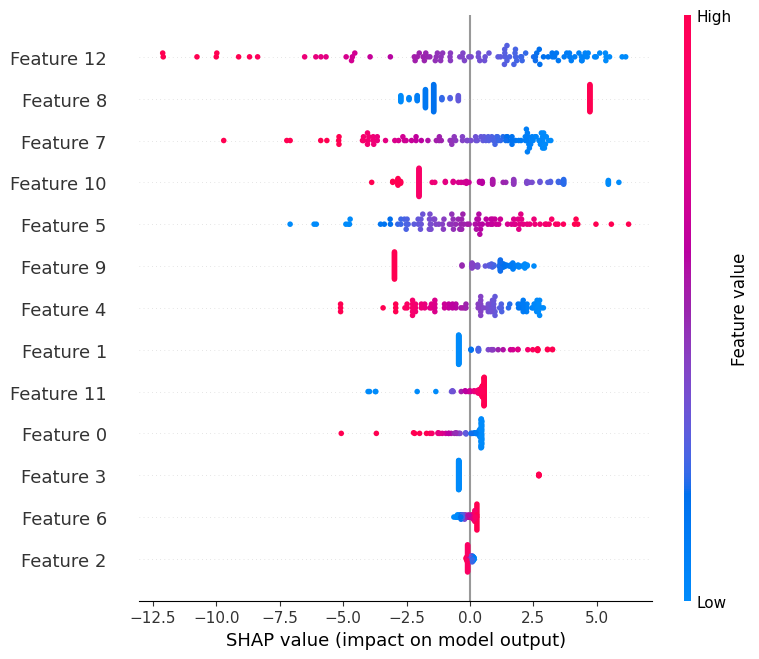

In [4]:
# 使用LinearExplainer
explainer_linear = shap.LinearExplainer(model, X_train)
shap_values_linear = explainer_linear.shap_values(X_test)
shap.summary_plot(shap_values_linear, X_test)

23.278295788646115


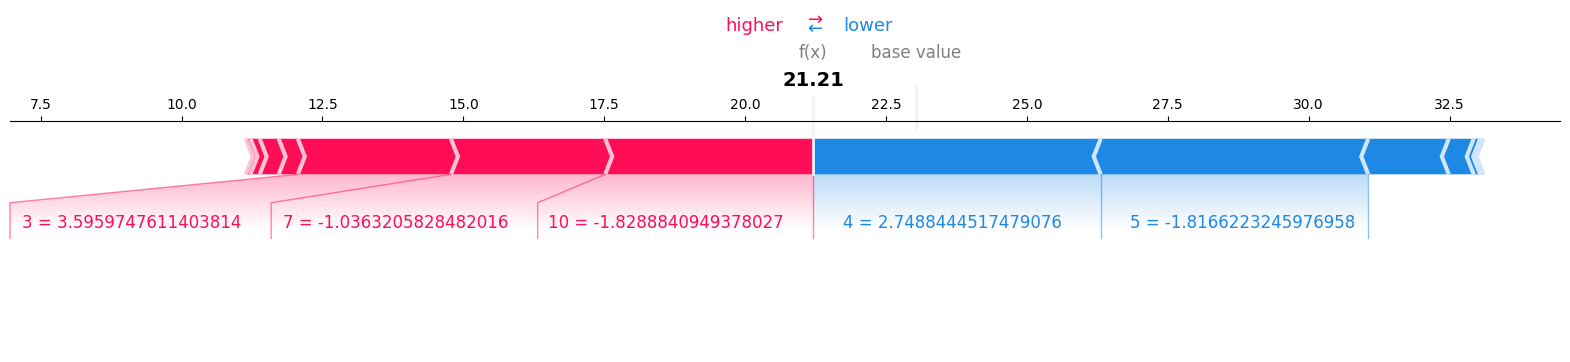

In [5]:
print(np.mean(model.predict(X_test)))
# 选择一个样本点，这里选择测试集的第一个样本点
single_sample = X_test[1]

# 使用LinearExplainer绘制单个样本点的SHAP值
shap_values_single = explainer_linear.shap_values(single_sample.reshape(1, -1))

# 绘制局部摘要图（即SHAP值的条形图）
shap.initjs() # 初始化JS可视化环境
shap.force_plot(explainer_linear.expected_value, shap_values_single,single_sample, feature_names=data.columns,matplotlib=True)